# Agenda
Data preprocessing is an important stage of data mining. In this exercise, we perform data cleansing as a preprocessing task. The exercise illustrates simple techniques that show how to (1) deal with missing values and (2) detect and manage outliers. The content for the remainder of this guide is as follows.

## Table of Contents
1. [Python Libraries](#libraries)  
    1.1 [Installing Python Libraries](#lib-install)  
    1.2 [Importing Python Libraries](#lib-import)  
2. [Data Cleansing](#cleansing)  
    2.1 [Loading Data Set](#dataset)  
    2.2 [Data Exploration](#exploration)  
    2.3 [Dealing with Missing Values](#missing)  
    2.4 [Detecting and Handling Outliers](#outliers)  
3. [Assessment](#assessment)  
    3.1 [Questions](#questions)  
    3.2 [Exercise](#exercise)      
    
# 1. Python Libraries <a name="libraries"></a>
## 1.1 Install Python libraries <a name="lib-install"></a>
This exercise will requires the following **Python** libraries:

<ul>
    <li><strong>numpy:</strong> numerical computations</li>
    <li><strong>pandas:</strong> data manipulation using DataFrames</li>
    <li><strong>scikit learn:</strong> predictive data analysis</li>
    <li><strong>matplotlib:</strong> plotting graphs</li>
    <li><strong>seaborn:</strong> nice graph visualization</li>
</ul>

In [1]:
# Installing Libraries (if not installed)
# !pip3 install matplotlib
# !pip3 install scikit-learn
# !pip3 install seaborn
# !pip3 install numpy
# !pip3 install pandas

## 1.2 Import libraries <a name="lib-import"></a>

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Cleansing <a name="cleansing"></a>
This exercise is adopted from [Exploratory Data Analysis (EDA) Using Python](https://www.youtube.com/watch?v=-o3AxdVcUtQ&t=169s)

## 2.1 Loading (dummy) Data Set <a name="dataset"></a>

In this exercise, we perform the following tasks:

<ol>
    <li>upload a dummy data set and </li>
    <li>load it into a Pandas DataFrame</li>
</ol>




In [3]:
df = pd.read_csv('sample_1.csv', sep=';')
df

,Gender,Age,Grade,Marks,Scholarship,Awards,Position
0,M,16,A,70.0,N,3,5.0
1,F,17,B,60.5,Y,5,10.0
2,F,15,A,90.2,Y,4,2.0
3,M,14,C,50.8,NaN,2,13.0
4,M,18,D,40.0,Y,1,16.0
5,F,13,D,42.3,Y,2,14.0
6,M,15,D,41.6,N,3,15.0
7,M,15,C,53.9,N,4,12.0
8,M,16,C,54.1,Y,2,NaN
9,F,14,B,65.7,N,1,8.0


## 2.2 Data Exploration <a name="exploration"></a>

In this exercise, we use descriptive statistical computations to get a rough idea of the data (to create a mental model of the data we are dealing with. This will help us quickly choose the right data cleansing techniques and tools.

In [5]:
df.head() # Show first 5 rows

,Gender,Age,Grade,Marks,Scholarship,Awards,Position
0,M,16,A,70.0,N,3,5.0
1,F,17,B,60.5,Y,5,10.0
2,F,15,A,90.2,Y,4,2.0
3,M,14,C,50.8,NaN,2,13.0
4,M,18,D,40.0,Y,1,16.0


In [6]:
df.tail() # Show last 5 rows

,Gender,Age,Grade,Marks,Scholarship,Awards,Position
13,M,18,B,67.4,NaN,5,7.0
14,F,15,E,27.9,N,2,18.0
15,M,16,B,68.8,Y,3,6.0
16,F,13,B,64.2,Y,1,9.0
17,F,54,A,92.7,Y,4,1.0


In [7]:
df.columns

Index(['Gender', 'Age', 'Grade', 'Marks', 'Scholarship', 'Awards', 'Position'], dtype='object')

In [8]:
df.shape # (rows, columns)

(18, 7)

So we now know that our data set has records starting from 0 to 17 (that is 18 records in total). Each record has 7 attributes (Gender, Age, Grade, Marks, Scholarship, Awards, Position) which makes 7 variables in our analysis.

We may run a simple statistical description to understand the central tendencies of the data set.

In [9]:
# Simple Statistical Description
df.describe()

,Age,Marks,Awards,Position
count,18.000000,18.000000,18.000000,17.000000
mean,17.555556,102.494444,2.833333,9.411765
std,9.205000,187.404355,1.294786,5.489294
min,13.000000,27.900000,1.000000,1.000000
25%,15.000000,44.425000,2.000000,5.000000
50%,15.500000,62.350000,3.000000,9.000000
75%,16.000000,69.700000,4.000000,14.000000
max,54.000000,850.000000,5.000000,18.000000


In [10]:
# Check for unique values
df.nunique()

Gender          2
Age             7
Grade           5
Marks          18
Scholarship     2
Awards          5
Position       17
dtype: int64

In [11]:
# Check for unique values in specific column
df['Gender'].unique()

array(['M', 'F'], dtype=object)

## 2.3 Dealing with Missing Values <a name="missing"></a>

A Pandas DataFrame, encodes missing values as Null (i.e. NaN). So, we can identify missing values by search all the NaN data points.

1. Check if the entire data set has any Null values

In [12]:
# Check if the entire data set has any Null values
df.isnull().values.any()

True

*isnull().values.any()* returns **True** for this data set, meaning we have missing values.

2. Check which columns/attributes have Null values

In [13]:
# Check which columns have Null values
df.isna().any()

Gender         False
Age            False
Grade          False
Marks          False
Scholarship     True
Awards         False
Position        True
dtype: bool

In [14]:
df[['Scholarship', 'Position']]

,Scholarship,Position
0,N,5.0
1,Y,10.0
2,Y,2.0
3,NaN,13.0
4,Y,16.0
5,Y,14.0
6,N,15.0
7,N,12.0
8,Y,NaN
9,N,8.0


In [16]:
df['Scholarship'].mode()

0    Y
dtype: object

In [18]:
df['Position'].mean()

9.38888888888889

We observe that only columns **'Scholarship'** and **'Position'** have Null values.

3. We replace the Null values with the **Mode**

In [17]:
# Update missing values
df['Scholarship'].fillna((df['Scholarship'].mode()), inplace=True)
df['Position'].fillna((df['Position'].mode()), inplace=True)


df[['Scholarship', 'Position']]

,Scholarship,Position
0,N,5.0
1,Y,10.0
2,Y,2.0
3,NaN,13.0
4,Y,16.0
5,Y,14.0
6,N,15.0
7,N,12.0
8,Y,9.0
9,N,8.0


Scholarship did not update; so, we do it manually.

In [15]:
df['Scholarship'].mode()

0    Y
dtype: object

In [19]:
df['Scholarship'] = df['Scholarship'].replace({np.nan: 'Y'})
df[['Scholarship', 'Position']]

,Scholarship,Position
0,N,5.0
1,Y,10.0
2,Y,2.0
3,Y,13.0
4,Y,16.0
5,Y,14.0
6,N,15.0
7,N,12.0
8,Y,9.0
9,N,8.0


## 2.4 Detecting and Handling Outliers <a name="outliers"></a>

We may apply 3 techniques to detect outliers:

<ol>
    <li>Binning</li>
    <li>Clustering</li>
    <li>Regression <strong>Individual Exercise</strong></li>
</ol>

### 1. Binning Method

We smoothen data using **binning** method as illustrated in the steps that follow:

a. Sort the data. In this example we use **Age** variable.

In [20]:
data = df['Age']
data = data.sort_values()
data

5     13
16    13
3     14
9     14
2     15
14    15
6     15
7     15
10    15
0     16
15    16
12    16
8     16
11    16
1     17
13    18
4     18
17    54
Name: Age, dtype: int64

b. Divide values into bin. In this example, we divide values into 3 bins

In [21]:
bins = np.array_split(data.values, 3)
bins

[array([13, 13, 14, 14, 15, 15], dtype=int64),
 array([15, 15, 15, 16, 16, 16], dtype=int64),
 array([16, 16, 17, 18, 18, 54], dtype=int64)]

c. Smooth data (e.g. by mean, median, bin boundaries). In this example we smooth by mean (replace all values by mean of the specific bin)

In [22]:
for bucket in bins:
    mn = bucket.mean()
    for i in range(bucket.size):
        bucket[i] = mn

bins

[array([14, 14, 14, 14, 14, 14], dtype=int64),
 array([15, 15, 15, 15, 15, 15], dtype=int64),
 array([23, 23, 23, 23, 23, 23], dtype=int64)]

d. Insert values back into the data set

In [23]:
bins = np.array(bins).flatten()
bins
df['Age'] = bins
df

,Gender,Age,Grade,Marks,Scholarship,Awards,Position
0,M,14,A,70.0,N,3,5.0
1,F,14,B,60.5,Y,5,10.0
2,F,14,A,90.2,Y,4,2.0
3,M,14,C,50.8,Y,2,13.0
4,M,14,D,40.0,Y,1,16.0
5,F,14,D,42.3,Y,2,14.0
6,M,15,D,41.6,N,3,15.0
7,M,15,C,53.9,N,4,12.0
8,M,15,C,54.1,Y,2,9.0
9,F,15,B,65.7,N,1,8.0


### 2. Clustering

We detect outliers using a simple **Scatter Plot**. In some complex cases, we may need to use **Clustering** algorithms. In this exercise, we limit ourselves to using a scatter plot. Clustering algorithms will be covered later in the course.


a. Select variable(s) and use **Seaborn library** to plot scatter plots. In this example we use the **Marks** variable against **Position** as our target variable.

<AxesSubplot:xlabel='Position', ylabel='Marks'>

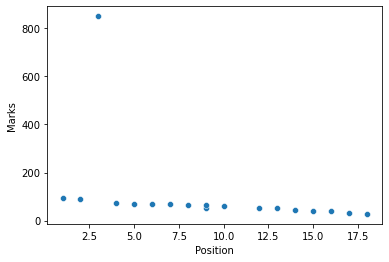

In [24]:

sns.scatterplot(data=df, x='Position', y='Marks')

Automatically we observe that we have one outlier whose value is **850**. It may have been a data entry error (i.e. **85.0**)


# 3. Assessment <a name="assessment"></a>

# 3.1 Questions <a name="questions"></a>
1. Briefly describe the **Numpy** library, explain its significance in this tutorial.
2. Briefly describe the **Pandas** library, explain its significance in this tutorial.
3. How did EDA assist the data cleansing task?
4. Why is binning not suitable for dealing with outliers in **Marks** variable?
5. How would have clustering improved the scatter plot above?

# 3.2 Exercise <a name="exercise"></a>
In this exercise, you are required to complete the following tasks:

    a. Save your cleaned data into a **CSV file**.
    b. Fit the **Marks** variable into a linear regression in order to detect any outlier (s).
    c. From the *Web Scrapping* exercise (previous class), perfrom EDA and data cleansing on your *scrapped data*. Save both **original** and **cleaned** data sets into a CSV file. Document all your steps and explanations in a Python Notebook. Put the 3 files into a folder, use your student number (ONLY) as the folder name. The lecturer will provide a link to upload your work.